In [1]:
!pip install qiskit
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.1 MB/s eta 0:00:00


In [2]:
# Deutsch Algorithm using Qiskit 2.x
# Compatible with Qiskit 2.0+ (2024–2025)

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

# Choose the function type: 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'
function_type = 'balanced_1'

def deutsch_oracle(qc, function_type):
    """Implements oracle Uf for given function type."""
    if function_type == 'constant_0':
        # f(x)=0 → Do nothing
        pass
    elif function_type == 'constant_1':
        # f(x)=1 → Apply X on the output qubit
        qc.x(1)
    elif function_type == 'balanced_0':
        # f(x)=x → Apply CNOT (control: input, target: output)
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        # f(x)=NOT(x) → Apply X, then CNOT, then X
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)

In [3]:
# Step 1: Initialize quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)

# Step 2: Initialize |x>|y> = |0>|1> and apply Hadamard
qc.x(1)             # Set output qubit to |1>
qc.barrier()
qc.h([0, 1])        # Apply Hadamard to both qubits

# Step 3: Apply the oracle
qc.barrier()
deutsch_oracle(qc, function_type)

In [4]:
# Step 4: Apply Hadamard to input qubit
qc.barrier()
qc.h(0)

# Step 5: Measure the first qubit
qc.measure(0, 0)

# Visualize circuit
print(qc.draw(output="text"))

           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 


In [5]:
# Step 6: Simulate
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

print("\nMeasurement results:", counts)

# Interpret result
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


Measurement results: {'1': 1024}
→ Function is BALANCED.


In [6]:
# Task 1 - Custom Oracle Design (f(x) = x XOR 1)
# This function flips the input x and returns it (equivalent to NOT(x))
# We’ll verify whether Deutsch’s algorithm detects it as CONSTANT or BALANCED.

# Define the custom oracle for f(x) = x XOR 1
def custom_oracle(qc):
    # For f(x) = x XOR 1 -> flip input before using it as control
    qc.x(0)       # NOT on input (x -> NOT(x))
    qc.cx(0, 1)   # CNOT controlled by modified x
    qc.x(0)       # Revert input to original

# Step 1: Initialize quantum circuit
qc = QuantumCircuit(2, 1)

# Step 2: Prepare |0>|1> and apply Hadamard to both
qc.x(1)
qc.barrier()
qc.h([0, 1])

# Step 3: Apply custom oracle
qc.barrier()
custom_oracle(qc)

# Step 4: Apply Hadamard on input qubit and measure
qc.barrier()
qc.h(0)
qc.measure(0, 0)

# Display the circuit
print(qc.draw(output="text"))

# Step 5: Simulate
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

print("\nMeasurement Results:", counts)

# Interpretation
if list(counts.keys())[0] == '0':
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 

Measurement Results: {'1': 1024}
→ Function is BALANCED.


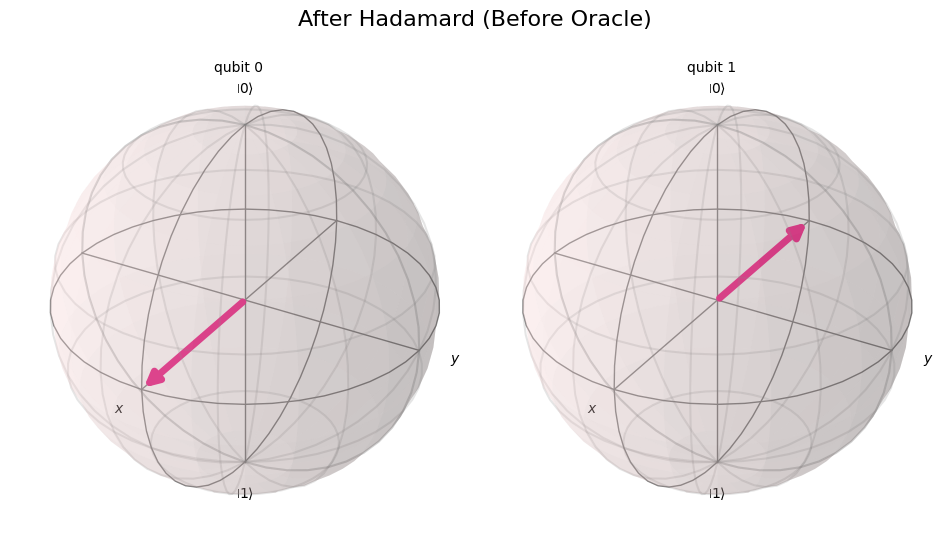

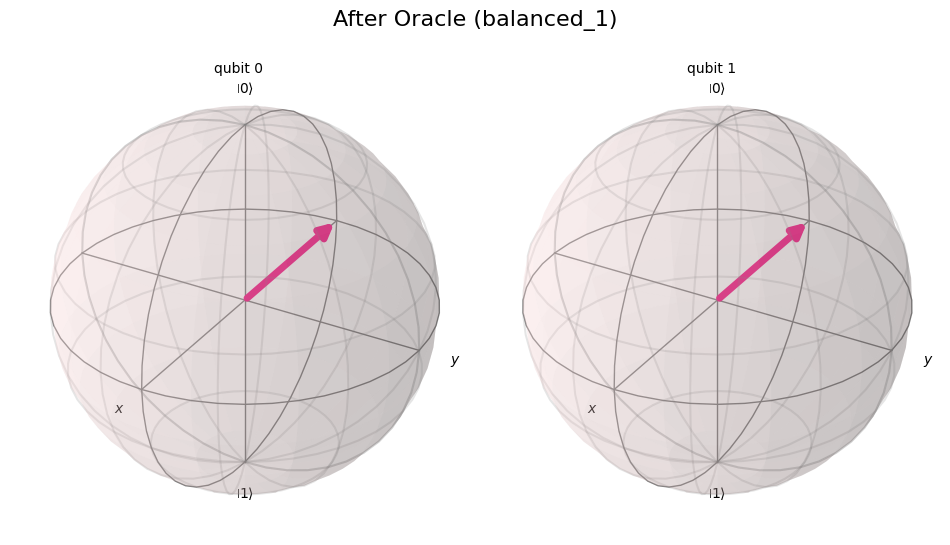

Bloch sphere visualizations show how Hadamard spreads superposition and how oracle modifies phase.


In [10]:
# ==========================
# Task 2: Bloch Sphere Visualization
# ==========================
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

# Step 1: Initialize circuit
qc_bloch = QuantumCircuit(2)
qc_bloch.x(1)          # |01> -> output qubit = |1>
qc_bloch.h([0, 1])     # Apply Hadamard on both qubits

# --- Visualize state after Hadamard ---
state_after_h = Statevector.from_instruction(qc_bloch)
display(plot_bloch_multivector(state_after_h, title="After Hadamard (Before Oracle)"))

# Step 2: Apply the oracle (same function type)
deutsch_oracle(qc_bloch, function_type)

# --- Visualize state after Oracle ---
state_after_oracle = Statevector.from_instruction(qc_bloch)
display(plot_bloch_multivector(state_after_oracle, title=f"After Oracle ({function_type})"))

print("Bloch sphere visualizations show how Hadamard spreads superposition and how oracle modifies phase.")


     ┌───┐      ░            ░ ┌───┐┌─┐   
q_0: ┤ H ├──────░───■────────░─┤ H ├┤M├───
     ├───┤      ░   │        ░ ├───┤└╥┘┌─┐
q_1: ┤ H ├──────░───┼────■───░─┤ H ├─╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘└───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/════════════════════════════════╩══╩═
                                     0  1 

Measurement results: {'11': 1024}


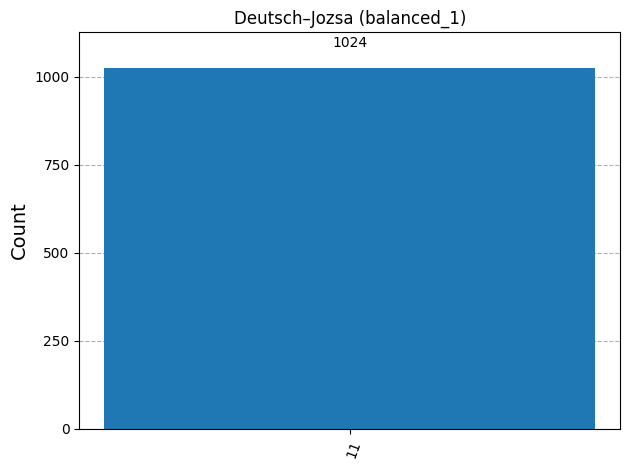

→ Function is BALANCED.


In [16]:
# ===========================================
# Task 3: Deutsch–Jozsa Extension (2-Qubit Inputs)
# ===========================================

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# -------------------------------------------
# Step 1: Define 2-input oracle
# -------------------------------------------
def deutsch_jozsa_oracle(qc, function_type):
    """
    Implements oracles for 2-input functions:
    - 'constant_0' : f(x1,x2) = 0
    - 'constant_1' : f(x1,x2) = 1
    - 'balanced_1' : f(x1,x2) = x1 XOR x2
    - 'balanced_2' : f(x1,x2) = NOT(x1 XOR x2)
    """
    if function_type == "constant_0":
        pass
    elif function_type == "constant_1":
        qc.x(2)
    elif function_type == "balanced_1":       # XOR
        qc.cx(0, 2)
        qc.cx(1, 2)
    elif function_type == "balanced_2":       # NOT XOR
        qc.x(2)
        qc.cx(0, 2)
        qc.cx(1, 2)

# -------------------------------------------
# Step 2: Initialize circuit (2 inputs + 1 output)
# -------------------------------------------
function_type = "balanced_1"   # Try "constant_0", "constant_1", "balanced_2" also

qc_dj = QuantumCircuit(3, 2)   # 3 qubits (2 inputs, 1 output), measure 2 inputs

# Step 3: Initialize |x>|y> = |00>|1>
qc_dj.x(2)              # Output qubit → |1>
qc_dj.h([0, 1, 2])      # Hadamard on all qubits
qc_dj.barrier()

# Step 4: Apply oracle
deutsch_jozsa_oracle(qc_dj, function_type)
qc_dj.barrier()

# Step 5: Apply Hadamard to input qubits only
qc_dj.h([0, 1])

# Step 6: Measure only input qubits
qc_dj.measure([0, 1], [0, 1])

# Display circuit
print(qc_dj.draw("text"))

# -------------------------------------------
# Step 7: Simulation
# -------------------------------------------
sim = AerSimulator()
compiled = transpile(qc_dj, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

# -------------------------------------------
# Step 8: Display results
# -------------------------------------------
print("\nMeasurement results:", counts)
display(plot_histogram(counts, title=f"Deutsch–Jozsa ({function_type})"))

# -------------------------------------------
# Step 9: Interpretation
# -------------------------------------------
if "00" in counts:
    print("→ Function is CONSTANT.")
else:
    print("→ Function is BALANCED.")


Ideal counts: {'0': 1024}
Noisy counts: {'1': 125, '0': 899}


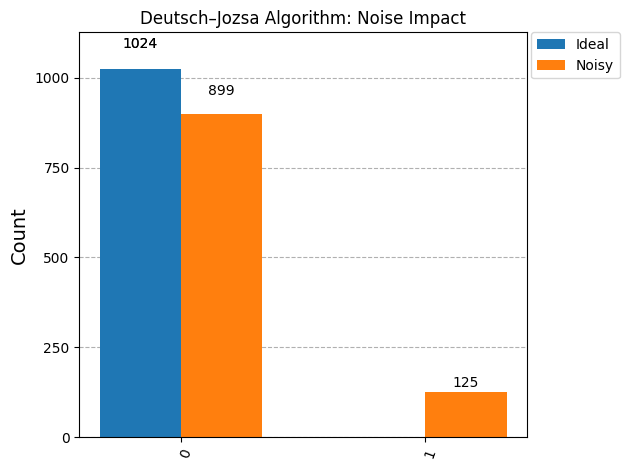

In [21]:
# --- Task 4: Noise Impact ---
# Deutsch–Jozsa Algorithm with and without noise (Qiskit 2.x Compatible)

!pip install qiskit qiskit-aer --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram

# Step 1: Create Deutsch–Jozsa circuit
qc = QuantumCircuit(2, 1)
qc.h([0, 1])
qc.cx(0, 1)   # Balanced oracle
qc.h(0)
qc.measure(0, 0)

# Step 2: Ideal simulation
sim_ideal = AerSimulator()
qc_ideal = transpile(qc, sim_ideal)
result_ideal = sim_ideal.run(qc_ideal, shots=1024).result()
counts_ideal = result_ideal.get_counts()

# Step 3: Define noise model
noise_model = NoiseModel()
error_1q = depolarizing_error(0.05, 1)   # 5% noise for 1-qubit gates
error_2q = depolarizing_error(0.10, 2)   # 10% noise for 2-qubit gates
noise_model.add_all_qubit_quantum_error(error_1q, ['h', 'x'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

# Step 4: Noisy simulation
sim_noisy = AerSimulator(noise_model=noise_model)
qc_noisy = transpile(qc, sim_noisy)
result_noisy = sim_noisy.run(qc_noisy, shots=1024).result()
counts_noisy = result_noisy.get_counts()

# Step 5: Compare
print("Ideal counts:", counts_ideal)
print("Noisy counts:", counts_noisy)

plot_histogram([counts_ideal, counts_noisy],
               legend=['Ideal', 'Noisy'],
               title='Deutsch–Jozsa Algorithm: Noise Impact')


In [26]:
# ============================
# Task 5: Classical vs Quantum Queries
# ============================

from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
import random

# --- Define possible function types ---
functions = {
    'constant_0': lambda x: 0,
    'constant_1': lambda x: 1,
    'balanced_0': lambda x: x,
    'balanced_1': lambda x: 1 - x
}

# --- Classical Approach ---
def classical_check(f):
    """Classically determine if f(x) is constant or balanced"""
    # Need to check both x=0 and x=1 to be sure
    f0, f1 = f(0), f(1)
    if f0 == f1:
        return "CONSTANT (needs 2 classical queries)"
    else:
        return "BALANCED (needs 2 classical queries)"

# --- Quantum Approach (Deutsch Algorithm) ---
def deutsch_quantum_check(f_type):
    qc = QuantumCircuit(2, 1)
    qc.x(1)
    qc.h([0, 1])

    # Oracle
    if f_type == 'constant_0':
        pass
    elif f_type == 'constant_1':
        qc.x(1)
    elif f_type == 'balanced_0':
        qc.cx(0, 1)
    elif f_type == 'balanced_1':
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)

    qc.h(0)
    qc.measure(0, 0)

    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()

    measured = max(counts, key=counts.get)
    if measured == '0':
        return "CONSTANT (needs 1 quantum query)"
    else:
        return "BALANCED (needs 1 quantum query)"

# --- Run Comparison ---
f_type = random.choice(list(functions.keys()))
print(f"Chosen function type: {f_type}\n")

# Classical method
print("Classical Result →", classical_check(functions[f_type]))

# Quantum method
print("Quantum Result   →", deutsch_quantum_check(f_type))


Chosen function type: constant_1

Classical Result → CONSTANT (needs 2 classical queries)
Quantum Result   → CONSTANT (needs 1 quantum query)
